In [9]:
import re
import unicodedata
import nltk
import env

import unicodedata
import re
import json
import os 
import wordcloud

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare

# 1

In [55]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [47]:
url = env.get_db_url("spam_db")
sql = "SELECT * FROM spam"

spam_df = pd.read_sql(sql, url, index_col="id")
spam_df = spam_df.reset_index()
spam_df.head()

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:

spam_df.rename(columns={'label':'title'})
spam_df
# spam_worked_df =  prepare.prep_article_data(spam_df, 'text', extra_words=[], exclude_words=[])


,id,label,text,clean,stemmed,lemmatized
0,0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goes usf lives around though,nah ' think goe usf live around though,nah ' think go usf life around though
...,...,...,...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u a750 pound prize ...,2nd time tri 2 contact u u a750 pound prize 2 ...,2nd time tried 2 contact u u a750 pound prize ...
5568,5568,ham,Will Ì_ b going to esplanade fr home?,i_ b going esplanade fr home,i_ b go esplanad fr home,i_ b going esplanade fr home
5569,5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions,piti mood soani suggest,pity mood soany suggestion
5570,5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like ' interested buying so...,guy bitch act like ' interest buy someth els n...,guy bitching acted like ' interested buying so...


In [60]:
ADDITIONAL_STOPWORDS = []
ham_words = clean(' '.join(spam_df[spam_df.label == 'ham'].text))
spam_words = clean(' '.join(spam_df[spam_df.label == 'spam'].text))
all_words = clean(' '.join(spam_df.text))

# bigrams = nltk.ngrams(spam_df.text.split(), 2)

top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))
top_20_ham_bigrams


['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 'spell',
 

In [58]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))
top_20_spam_bigrams

(please, call)          44
(customer, service)     27
(contact, u)            24
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(await, collection)     19
(send, stop)            19
(every, week)           19
(land, line)            18
(urgent, mobile)        18
(2, claim)              17
(claim, call)           17
(valid, 12hrs)          17
(sae, tc)               16
(call, 08000930705)     16
(account, statement)    16
(call, customer)        15
(dating, service)       15
dtype: int64

In [111]:
top_20_all_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))
top_20_all_bigrams

(please, call)         53
(call, later)          52
(ill, call)            48
(let, know)            41
(r, u)                 40
(u, r)                 40
(sorry, ill)           39
(dont, know)           38
(new, year)            32
(good, morning)        31
(wan, 2)               31
(customer, service)    29
(take, care)           26
(contact, u)           26
(u, get)               26
(po, box)              25
(im, going)            24
(guaranteed, call)     23
(u, know)              23
(u, wan)               23
dtype: int64

In [120]:
ham_freq = pd.Series(ham_bigrams).value_counts()
spam_freq = pd.Series(spam_bigrams).value_counts()
all_freq = pd.Series(all_bigrams).value_counts()

spam_freq.head()

(please, call)         44
(customer, service)    27
(contact, u)           24
(po, box)              24
(a1000, cash)          23
dtype: int64

In [113]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

# word_counts.head()

In [114]:
### Bigrams

In [115]:
spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2)))
string = ' '.join([str(element) for element in spam_bigrams])

# spam_bigrams = ' '.join(spam_bigrams)
# spam_bigrams.head()

string

"('free', 'entry') ('entry', '2') ('2', 'wkly') ('wkly', 'comp') ('comp', 'win') ('win', 'fa') ('fa', 'cup') ('cup', 'final') ('final', 'tkts') ('tkts', '21st') ('21st', 'may') ('may', '2005') ('2005', 'text') ('text', 'fa') ('fa', '87121') ('87121', 'receive') ('receive', 'entry') ('entry', 'questionstd') ('questionstd', 'txt') ('txt', 'ratetcs') ('ratetcs', 'apply') ('apply', '08452810075over18s') ('08452810075over18s', 'freemsg') ('freemsg', 'hey') ('hey', 'darling') ('darling', '3') ('3', 'week') ('week', 'word') ('word', 'back') ('back', 'id') ('id', 'like') ('like', 'fun') ('fun', 'still') ('still', 'tb') ('tb', 'ok') ('ok', 'xxx') ('xxx', 'std') ('std', 'chgs') ('chgs', 'send') ('send', 'a150') ('a150', 'rcv') ('rcv', 'winner') ('winner', 'valued') ('valued', 'network') ('network', 'customer') ('customer', 'selected') ('selected', 'receivea') ('receivea', 'a900') ('a900', 'prize') ('prize', 'reward') ('reward', 'claim') ('claim', 'call') ('call', '09061701461') ('09061701461', '

In [116]:
ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2)))
ham_bigrams.head()

0          (go, jurong)
1       (jurong, point)
2        (point, crazy)
3    (crazy, available)
4    (available, bugis)
dtype: object

In [117]:
all_bigrams = (pd.Series(nltk.ngrams(all_words, 2)))
all_bigrams.head()

0          (go, jurong)
1       (jurong, point)
2        (point, crazy)
3    (crazy, available)
4    (available, bugis)
dtype: object

In [118]:
from wordcloud import WordCloud

sentence = 'Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow.'

img = WordCloud(background_color='white').generate(sentence)


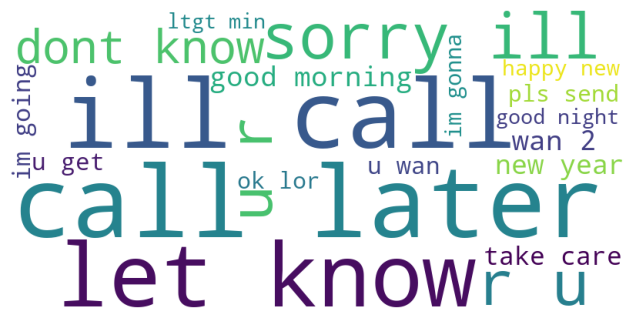

In [121]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

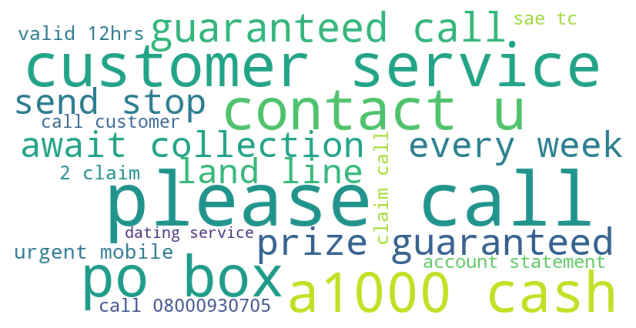

In [122]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### Trigrams

In [123]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))

top_20_all_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts()
                      .head(20))



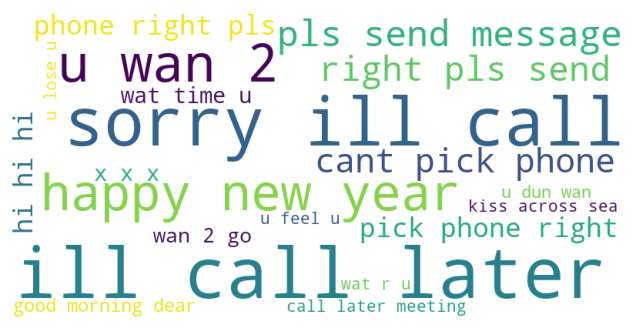

In [125]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

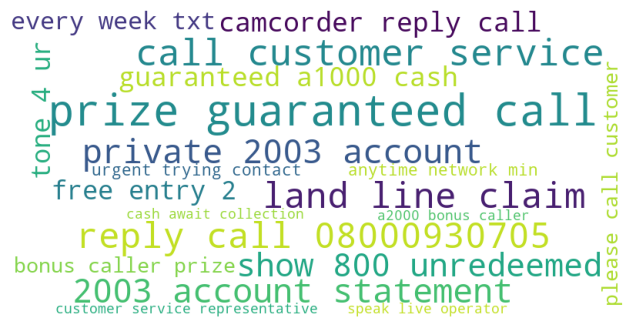

In [126]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

# 2

In [11]:
codeup_blog = acquire.acquire_codeup_blog()

In [12]:
codeup_blog

[{'title': 'Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa',
  'content': 'May is traditionally known as Asian American and Pacific Islander (AAPI) Heritage Month. This month we celebrate the history and contributions made possible by our AAPI friends, family, and community. We also examine our level of support and seek opportunities to better understand the AAPI community.\n\nIn an effort to address real concerns and experiences, we sat down with Arbeena Thapa, one of Codeup’s Financial Aid and Enrollment Managers.\nArbeena identifies as Nepali American and Desi. Arbeena’s parents immigrated to Texas in 1988 for better employment and educational opportunities. Arbeena’s older sister was five when they made the move to the US. Arbeena was born later, becoming the first in her family to be a US citizen.\nAt Codeup we take our efforts at inclusivity very seriously. After speaking with Arbeena, we were taught that the term AAPI excludes Desi-America

In [13]:
codeup_blog_df = pd.DataFrame(codeup_blog)
codeup_blog_df

,title,content
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...
1,Women in tech: Panelist Spotlight – Magdalena ...,Women in tech: Panelist Spotlight – Magdalena ...
2,Women in tech: Panelist Spotlight – Rachel Rob...,Women in tech: Panelist Spotlight – Rachel Rob...
3,Women in Tech: Panelist Spotlight – Sarah Mellor,Women in tech: Panelist Spotlight – Sarah Mell...
4,Women in Tech: Panelist Spotlight – Madeleine ...,Women in tech: Panelist Spotlight – Madeleine ...
5,Black Excellence in Tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...


In [21]:
codeup_blog_df = prepare.prep_article_data(codeup_blog_df, 'content', extra_words=[], exclude_words=[])

In [22]:
codeup_blog_df

,title,content,clean,stemmed,lemmatized
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...,may traditionally known asian american pacific...,may tradit known asian american pacif island a...,may traditionally known asian american pacific...
1,Women in tech: Panelist Spotlight – Magdalena ...,Women in tech: Panelist Spotlight – Magdalena ...,women tech panelist spotlight magdalena rahn c...,women tech panelist spotlight magdalena rahn c...,woman tech panelist spotlight magdalena rahn c...
2,Women in tech: Panelist Spotlight – Rachel Rob...,Women in tech: Panelist Spotlight – Rachel Rob...,women tech panelist spotlight rachel robbinsma...,women tech panelist spotlight rachel robbinsma...,woman tech panelist spotlight rachel robbinsma...
3,Women in Tech: Panelist Spotlight – Sarah Mellor,Women in tech: Panelist Spotlight – Sarah Mell...,women tech panelist spotlight sarah mellor cod...,women tech panelist spotlight sarah mellor cod...,woman tech panelist spotlight sarah mellor cod...
4,Women in Tech: Panelist Spotlight – Madeleine ...,Women in tech: Panelist Spotlight – Madeleine ...,women tech panelist spotlight madeleine capper...,women tech panelist spotlight madelein capper ...,woman tech panelist spotlight madeleine capper...
5,Black Excellence in Tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...,black excellence tech panelist spotlight wilma...,black excel tech panelist spotlight wilmari de...,black excellence tech panelist spotlight wilma...


In [148]:
bigrams_one = (pd.Series(nltk.ngrams(codeup_blog_df[codeup_blog_df['title'] == 'Spotlight on APIDA Voices: Celebrating Heritage and Inspiring Change ft. Arbeena Thapa'], 2)))
bigrams_one

0         (title, content)
1         (content, clean)
2         (clean, stemmed)
3    (stemmed, lemmatized)
dtype: object

# 3 

In [14]:
blog_articles = acquire.get_blog_articles()

In [15]:
blog_articles

[{'title': 'Nepal asks India for rice, sugar to avert possible food scarcity',
  'content': 'Nepal government has requested India to facilitate the supply of paddy, rice and sugar as a precautionary measure to mitigate any possible food scarcity in the festive season—October and November. "Nepal has requested India to provide one million tonnes of paddy, 100,000 tonnes of rice and 50,000 tonnes of sugar," Commerce and Supplies Ministry Joint Secretary Ram Chandra Tiwari said.',
  'category': 'business'},
 {'title': 'GQG Partners buys 8.1% stake in Adani Power for $1.1 bn: Report',
  'content': 'Investment firm GQG Partners bought an 8.1% stake in Adani Power for $1.1 billion via block deals on Wednesday, Reuters cited a source as saying. Multiple GQG funds bought around 152.1 million shares, BSE data showed, from Worldwide Emerging Market Holding and Afro Asia Trade and Investments. The investment comes days after Deloitte quit as auditor for Adani Ports.',
  'category': 'business'},
 

In [16]:
blog_articles_df = pd.DataFrame(blog_articles)
blog_articles_df

,title,content,category
0,"Nepal asks India for rice, sugar to avert poss...",Nepal government has requested India to facili...,business
1,GQG Partners buys 8.1% stake in Adani Power fo...,Investment firm GQG Partners bought an 8.1% st...,business
2,"USDA cuts rice trade forecast for 2023, 2024 p...",US Department of Agriculture (USDA) lowered th...,business
3,Hyundai to buy General Motors' Talegaon plant ...,Hyundai Motor India signed an asset purchase a...,business
4,Nifty50 firms chiefs' average remuneration dro...,Combined remuneration for the heads of the Nif...,business
5,H&M probes labour abuses at Myanmar garment fa...,H&M is investigating 20 alleged instances of l...,business
6,Irish bank glitch lets people with no money wi...,A glitch in Bank of Ireland's app allowed cust...,business
7,"Union Cabinet approves ₹32,500 crore for seven...","Union Cabinet approved a ₹32,500-crore budget ...",business
8,Netherlands slips into recession,The Dutch economy has entered a recession as i...,business
9,Cardamom prices nearly double over low rainfal...,Cardamom prices are rising rapidly due to 30-5...,business


In [23]:
blog_articles_df = prepare.prep_article_data(blog_articles_df, 'content', extra_words=[], exclude_words=[])

In [25]:
blog_articles_df

,title,content,clean,stemmed,lemmatized
0,"Nepal asks India for rice, sugar to avert poss...",Nepal government has requested India to facili...,nepal government requested india facilitate su...,nepal govern request india facilit suppli padd...,nepal government requested india facilitate su...
1,GQG Partners buys 8.1% stake in Adani Power fo...,Investment firm GQG Partners bought an 8.1% st...,investment firm gqg partners bought 81 stake a...,invest firm gqg partner bought 81 stake adani ...,investment firm gqg partner bought 81 stake ad...
2,"USDA cuts rice trade forecast for 2023, 2024 p...",US Department of Agriculture (USDA) lowered th...,us department agriculture usda lowered global ...,us depart agricultur usda lower global rice tr...,u department agriculture usda lowered global r...
3,Hyundai to buy General Motors' Talegaon plant ...,Hyundai Motor India signed an asset purchase a...,hyundai motor india signed asset purchase agre...,hyundai motor india sign asset purchas agreeme...,hyundai motor india signed asset purchase agre...
4,Nifty50 firms chiefs' average remuneration dro...,Combined remuneration for the heads of the Nif...,combined remuneration heads nifty50 companies ...,combin remuner head nifty50 compani fell 25 10...,combined remuneration head nifty50 company fel...
5,H&M probes labour abuses at Myanmar garment fa...,H&M is investigating 20 alleged instances of l...,hm investigating 20 alleged instances labour a...,hm investig 20 alleg instanc labour abus myanm...,hm investigating 20 alleged instance labour ab...
6,Irish bank glitch lets people with no money wi...,A glitch in Bank of Ireland's app allowed cust...,glitch bank ireland ' app allowed customers lo...,glitch bank ireland ' app allow custom low bal...,glitch bank ireland ' app allowed customer low...
7,"Union Cabinet approves ₹32,500 crore for seven...","Union Cabinet approved a ₹32,500-crore budget ...",union cabinet approved 32500crore budget seven...,union cabinet approv 32500crore budget seven r...,union cabinet approved 32500crore budget seven...
8,Netherlands slips into recession,The Dutch economy has entered a recession as i...,dutch economy entered recession shrank 03 quar...,dutch economi enter recess shrank 03 quarterli...,dutch economy entered recession shrank 03 quar...
9,Cardamom prices nearly double over low rainfal...,Cardamom prices are rising rapidly due to 30-5...,cardamom prices rising rapidly due 3050 less r...,cardamom price rise rapidli due 3050 less rain...,cardamom price rising rapidly due 3050 le rain...
